# Part1 Rendering a Lambertian sphere

## Q1
We want to create a picture of a `shaded sphere` like in the lecture slides, which means we need to first define a `spherical surface`. 

- Assume that it has a radius of r=60.
- Define the surface as a parametrization of z-values using z= z(x,y), which determines the points that satisfy the condition of being a sphere.
    - Equation of surface of sphere : 4πr^2
- The full set of points on the surface is easily defined using `np.linspace`then!
- Please take `only one hemisphere (the positive one)`.
- According to the `cosine-law`, `the intensity at each point is the dot-product of the normal of the surface with the lighting direction`.
- Normal n=[nx,ny,nz] is the cross-product of the partial derivatives of the sphere parametrization with respect to x and y.

$$[ 𝑛𝑥 = \frac{−𝜕𝑧(𝑥,𝑦)}{𝜕𝑥} , 𝑛𝑦 = \frac{− 𝜕𝑧(𝑥,𝑦)}{𝜕𝑦}, 𝑛𝑧 = 1 ]$$


In [ ]:
# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# for math calculation
from math import cos
import numpy as np

### Get Derivatives by hand

Since this is the equation of the sphere :

$$ x^2 + y^2 + z^2 = 60^2 $$

We can get z(x,y) equation like below :
$$ z = \sqrt{60^2-x^2-y^2} $$

Then the normal n = [nx, ny, nz] can be derivated as below:
$$ nx = -\frac{\partial{z(x,y)}}{\partial{x}} = \frac{x}{\sqrt{60^2-x^2-y^2}} = \frac{x}{z}$$

$$ ny = -\frac{\partial{z(x,y)}}{\partial{y}} = \frac{y}{\sqrt{60^2-x^2-y^2}} = \frac{y}{z}$$

$$ nz = 1 = \frac{z}{z} $$

### Plot 2D

In [ ]:
def plot_sphere_2d(light_source=None):
    '''
    Arguments
        light_source: Coordinates of the light source input [x, y, z]. Must be of list type.
    '''
    assert isinstance(light_source, list), "Input light_source should be of list type"
    
    # Linespace closeness
    N = 1000

    # Given radius information
    radius = 60

    # Define u, v space
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)

    # Sphere parameterization: set x, y, z(=z(x, y))
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # positive only -> hemisphere
    x = x[np.where(z >= 0)]
    y = y[np.where(z >= 0)]
    z = z[np.where(z >= 0)]
    
    # Get normal vector using the derivatives from above
    norm = np.divide(np.array((x, y, z)), z).transpose()
    norm_denom = np.array([np.sqrt(np.sum(np.power(norm, 2), axis=-1)),]*3).transpose()
    Nv = np.divide(norm, norm_denom)
    
    # Light source
    Lv = np.array([light_source,]*len(x))
    
    # Intensity values for each points
    intensity = np.sum(Nv * Lv, axis=-1)
    
    # Plot
    plt.figure(figsize=(7, 7))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.scatter(x, y, s=0.1, c=intensity, cmap='gray')
    

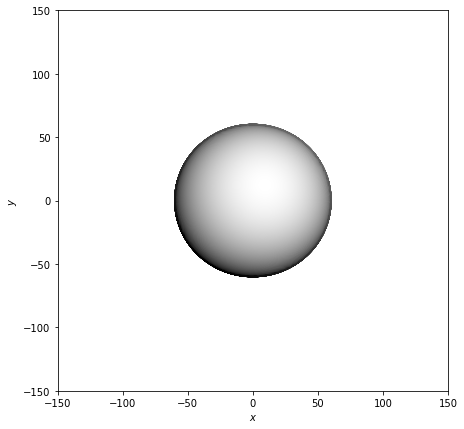

In [ ]:
light_source = [0.15, 0.2, 0.94]
plot_sphere_2d(light_source=light_source)

### Plot 3D

In [ ]:
def plot_sphere_3d(light_source=None):
    '''
    Arguments
        light_source: Coordinates of the light source input [x, y, z]. Must be of list type.
    '''
    assert isinstance(light_source, list), "Input light_source should be of list type"
    
    # Linespace closeness
    N = 1000

    # Given radius information
    radius = 60

    # Define u, v space
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)

    # Sphere parameterization: set x, y, z(=z(x, y))
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # positive only -> hemisphere
    x = x[np.where(z >= 0)]
    y = y[np.where(z >= 0)]
    z = z[np.where(z >= 0)]
    
    # Get normal vector using the derivatives from above
    norm = np.divide(np.array((x, y, z)), z).transpose()
    norm_denom = np.array([np.sqrt(np.sum(np.power(norm, 2), axis=-1)),]*3).transpose()
    Nv = np.divide(norm, norm_denom)
    
    # Light source
    Lv = np.array([light_source,]*len(x))
    
    # Intensity values for each points
    intensity = np.sum(Nv * Lv, axis=-1)
    
    # Plot
    # create 3d axes
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d') 

    plt.style.use('grayscale')

    # set axis labels
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.set_xlim(-150, 150)
    ax.set_ylim(-150, 150)
    ax.set_zlim(-150, 150)

    ax.scatter3D(x, y, z,  s=1, c=intensity, cmap ='gray')

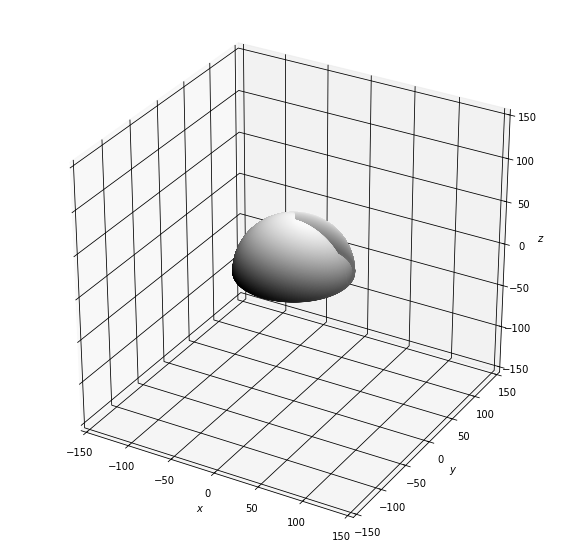

In [ ]:
light_source = [0.15, 0.2, 0.94]
plot_sphere_3d(light_source=light_source)

## Q1-bonus

In [ ]:
import os
from glob import glob
import imageio

In [ ]:
def animated_sphere(light_source_list=None,
                    plot_save_dir='sphere_images',
                    ani_save_path='./moving_light.gif'):
    '''
    Arguments
        light_source_list : List of coordinates of light source. Better be sequentially constructed to making real-like moving light.
        plot_save_dir     : Directory to save plots in .png format. This directory is also used for making .gif animation.
        ani_save_path     : Path to save animated plot (.gif format)
    '''
    
    # Assertions
    assert isinstance(light_source_list, list), "light_source_list must be of list type."
    assert os.path.exists(os.path.join(os.getcwd(), plot_save_dir)), f"No such directory: {os.path.join(os.getcwd(), plot_save_dir)}"
    
    # Hyper-parameters
    N = 1000
    radius = 60

    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)

    # Sphere parameterization: set x, y, z(=f(x, y))
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    # positive only -> hemisphere
    x = x[np.where(z >= 0)]
    y = y[np.where(z >= 0)]
    z = z[np.where(z >= 0)]

    # Get normal vectors
    norm = np.divide(np.array((x, y, z)), z).transpose()
    norm_denom = np.array([np.sqrt(np.sum(np.power(norm, 2), axis=-1)),]*3).transpose()
    Nv = np.divide(norm, norm_denom)
    
    # Make animated plots
    print("Start drawing plots")
    for idx, light_source in enumerate(light_source_list):

        fig, ax = plt.subplots(figsize=(7, 7))

        plt.cla() # delete current axis info
        plt.xlim(-150, 150)
        plt.ylim(-150, 150)

        # Light source
        Lv = np.array([light_source,]*len(x))

        # Intensity values for each points
        intensity = np.sum(Nv * Lv, axis=-1)

        # Plot
        plt.scatter(x, y, s=0.1, c=intensity, cmap='gray')
        ax.axis('off')
        
        plot_name =  f'shade_sphere_{str(idx+1).zfill(2)}.png'
        plt.savefig(os.path.join(plot_save_dir, plot_name))
        print(f"\t({idx+1}/{len(light_source_list)})th plot saved at: {os.path.join(plot_save_dir, plot_name)}")
        
        plt.close()
    
    print("Plots saving done.\n")
    
    # Making animation file(.gif) using the saved plots above.
    png_list = sorted(glob(os.path.join(plot_save_dir, '*.png')))
    
    images = []
    for filename in png_list:
        images.append(imageio.imread(filename))
        
    imageio.mimsave(ani_save_path, images, duration=0.7)
    print(f"Animation saved at: {ani_save_path}")

In [ ]:
light_source_list = [[0.15, -0.7, 0.94], [0.15, -0.5, 0.94], [0.15, -0.3, 0.94],
                     [0.15, 0., 0.94], [0.15, 0.2, 0.94], [0.15, 0.4, 0.94],
                     [0.15, 0.6, 0.94], [0.15, 0.8, 0.94], [0.15, 1.0, 0.94],
                     [0.15, 1.0, 0.7], [0.15, 1.0, 0.5], [0.15, 1.0, 0.3]]

animated_sphere(light_source_list)

Start drawing plots
	(1/12)th plot saved at: sphere_images/shade_sphere_01.png
	(2/12)th plot saved at: sphere_images/shade_sphere_02.png
	(3/12)th plot saved at: sphere_images/shade_sphere_03.png
	(4/12)th plot saved at: sphere_images/shade_sphere_04.png
	(5/12)th plot saved at: sphere_images/shade_sphere_05.png
	(6/12)th plot saved at: sphere_images/shade_sphere_06.png
	(7/12)th plot saved at: sphere_images/shade_sphere_07.png
	(8/12)th plot saved at: sphere_images/shade_sphere_08.png
	(9/12)th plot saved at: sphere_images/shade_sphere_09.png
	(10/12)th plot saved at: sphere_images/shade_sphere_10.png
	(11/12)th plot saved at: sphere_images/shade_sphere_11.png
	(12/12)th plot saved at: sphere_images/shade_sphere_12.png
Plots saving done.

Animation saved at: ./moving_light.gif
